# Parameters

In [75]:
import pandas as pd
import numpy as np

# Função para calcular o volume com base nos parâmetros
def calculate_volume(params):
        
    H           = 12.02081528  # Distance between paralel circles (mm)
    L           = 8.5000       # Distance between diagonal circles (mm)
    r_inlet     = 0.8          # Inlet radius (mm)
    r_outlet    = 0.8          # Outlet radius (mm)

    channel_widht = params['c_h']     # Channel width (mm)
    r_p = params['r_p']
    num_rows = params['num_rows']
    num_columns = params['num_columns']
    r_d = params['r_d']
    extr = params['extr']
    
    boundary_area = pi * (r_inlet)**2 # Inlet and Outlet areas
    p = L -  (r_d + r_p)              # Minimum distance between diagonal circles (mm)
    c = channel_widht / (2 * r_d)     # Angle calculation to create the channel lines (degrees)
    alpha         = 2 * asin(c)       # Channel width opening angle (degrees)
    m_alpha         = alpha/2         # Half Channel width opening angle (radians)
    
    base_angle = radians(45.0000)     # Angle of the channel in relation to the axes of the circle (radians)
    base_angle_degrees = 45.0000      # Angle of the channel in relation to the axes of the circle (degrees)
    
    up_angle  = base_angle + m_alpha  # Region of the top line space given in relation to the base angle
    low_angle = base_angle - m_alpha  # Region of the low line space given in relation to the base angle
    
    c_rd = 2 * r_d * sin(alpha / 2)
    int_arcsin = c_rd / (2 * r_p)
    p_alpha = 2 * asin(int_arcsin)
    mp_alpha = p_alpha / 2
    
    
    # Calculate distance between the circle and the channel line
    d_p = r_p - sqrt( r_p**2 - (sin(mp_alpha) * r_p)**2)
    d_d = r_d - sqrt( r_d**2 - (sin(m_alpha) * r_d)**2)
    
    
    if horizontal:
        #horizontal channels
        # h: Height of the triangle inside the diagonal circle
        # e: Distance from the center of the diagonal circle section
        h_d = r_d - (r_d - sqrt( r_d**2 - (sin(m_alpha) * r_d)**2))
        e_d = (r_d - sqrt( r_d**2 - (sin(m_alpha) * r_d)**2)) 
    
        # h: Height of the triangle inside paralel the circle
        # e: Distance from the center of the paralel circle section
        h_p = r_p - (r_p - sqrt( r_p**2 - (sin(mp_alpha) * r_p)**2))
        e_p = (r_p - sqrt( r_p**2 - (sin(mp_alpha) * r_p)**2)) 
        
    
        # width: diagonal channel width
        # length: diagonal channel length
        dh_width     =  (2 * r_d * sin(m_alpha)) #(mm)
        dh_length    =  (H - 2* r_d) + 2 * e_d   #(mm)
    
        # width: paralel channel width
        # length: paralel channel length
        ph_width     =  (2 * r_d * sin(m_alpha)) #(mm)
        ph_length    =  (H - 2 * r_p) + 2 * e_p  #(mm)
    
        # Aset: Area of the sector of the diagonal circle
        # Atri: Area of the triangle in the diagonal circle
        # Aseg: Segment area (what's left of the channel area)
        dh_Aset = (r_d**2 * alpha) / 2         #(mm^2)
        dh_Atri = (dh_width * h_d ) / 2        #(mm^2)
        dh_Aseg = dh_Aset - dh_Atri            #(mm^2)
    
        # Aset: Area of the sector of the paralel circle
        # Atri: Area of the triangle in the paralel circle
        # Aseg: Segment area (what's left of the channel area)
        ph_Aset = (r_p**2 * p_alpha) / 2       #(mm^2)
        ph_Atri = (ph_width * h_p ) / 2        #(mm^2)
        ph_Aseg = ph_Aset - ph_Atri            #(mm^2)
    
        # channel_area: Area of the channel between the diagonal circles
        dh_channel_area = (dh_length * dh_width)  -  2*dh_Aseg #(mm^2)
        ph_channel_area = (ph_length * ph_width)  -  2*ph_Aseg  #(mm^2)
    
    
    # Diagonals channels
    p_circle_area = pi * (r_p**2)
    d_circle_area = pi * (r_d**2)
    
    # h: Height of the triangle inside the diagonal circle
    # e: Distance from the center of the diagonal circle section
    h_d = r_d - (r_d - sqrt( r_d**2 - (sin(m_alpha) * r_d)**2))
    e_d = (r_d - sqrt( r_d**2 - (sin(m_alpha) * r_d)**2)) 
    
    # h: Height of the triangle inside paralel the circle
    # e: Distance from the center of the paralel circle section
    h_p = r_p - (r_p - sqrt( r_p**2 - (sin(mp_alpha) * r_p)**2))
    e_p = (r_p - sqrt( r_p**2 - (sin(mp_alpha) * r_p)**2)) 
    
    # width: diagonal channel width
    # length: diagonal channel length
    d_width     =  (2 * r_d * sin(m_alpha)) #(mm)
    d_length    =  (p) + e_d + e_p          #(mm)
    
    
    # width: paralel channel width
    # length: paralel channel length
    p_width     =  (2 * r_p * sin(mp_alpha)) #(mm)
    p_length    =  (p) + 2 * e_p             #(mm)
    
    
    # Aset: Area of the sector of the diagonal circle
    # Atri: Area of the triangle in the diagonal circle
    # Aseg: Segment area (what's left of the channel area)
    d_Aset = (r_d**2 * alpha) / 2         #(mm^2)
    d_Atri = (d_width * h_d ) / 2         #(mm^2)
    d_Aseg = d_Aset - d_Atri              #(mm^2)
    
    
    # Aset: Area of the sector of the paralel circle
    # Atri: Area of the triangle in the paralel circle
    # Aseg: Segment area (what's left of the channel area)
    p_Aset = (r_p**2 * p_alpha) / 2       #(mm^2)
    p_Atri = (p_width * h_p ) / 2         #(mm^2)
    p_Aseg = p_Aset - p_Atri              #(mm^2)
    
    # channel_area: Area of the channel between the diagonal circles
    channel_area = (d_length * d_width)  -  d_Aseg  - p_Aseg  #(mm^2)
    
    
    #***************
    # Catalyst wall
    #***************
    # Needed areas: 
    # Lateral area of the channels
    # A section of the cylinder's area, inner part
    # 3 sections of the cylinder area for the contour cameras
    # 4 sections of the cylinder area for the external cameras
    # Bottom area of the geometry
    
    # Caption:
    # cl   = Channel lenght
    # lac  = Lateral area of the channels (FSI)
    # plac = Perpendicular lateral area of the channels
    # d_ca   = Diagonal Cilinder Area
    # p_ca   = Paralel Cilinder Area 
    # d_osc  = One section of the diagonal cilinder area (FSI)
    # p_osc  = One section of the paralel cilinder area (FSI)
    # p_tsc  = Three sections of the cilinder area (FSI)
    # d_fsc  = Four sections of the cilinder area (FSI)
    # p_fsc  = Four sections of the cilinder area (FSI)
    # ba   = Bottom area (FSI)
    # ua   = Upper area (BSI)
    
    if horizontal:
        total_d_chambers = ((num_columns - 1) * (num_rows-1))  # Number of diagonal chambers
        total_p_chambers = num_columns * num_rows  # Number of paralel  chambers
        total_channels = total_p_chambers + total_d_chambers 
        
        t_ph_channels = ((num_columns - 2) * (num_rows - 1)) * ph_channel_area
        t_dh_channels = ((num_columns - 1) * (num_rows - 2)) * dh_channel_area
        t_h_area = t_dh_channels + t_ph_channels
        Vol_channel = t_h_area * 3
        #print(f"O volume do canal foi: {Vol_channel} mm3")
    
        ba = t_h_area + (total_d_chambers * d_circle_area +  total_p_chambers * p_circle_area) + ((total_d_chambers * 4) * channel_area) # (mm^2)
        #print(f"A area de fundo foi: {ba} mm²")
        Volume = ba * extr
        #print(f"O volume total do reator foi: {Volume} mm3")

        total_channel_volume = (((total_d_chambers * 4) * channel_area)*3)
        Vol_ratio = total_channel_volume/Volume
    
    else:
        # Only diagonals
        total_d_chambers = ((num_columns - 1) * (num_rows-1))  # Number of diagonal chambers
        total_p_chambers = num_columns * num_rows  # Number of paralel  chambers
    
        Vol_channel = channel_area * 3
        #print(f"O volume do canal foi: {Vol_channel} mm3")
        
        ba = (total_d_chambers * d_circle_area +  total_p_chambers * p_circle_area) + ((total_d_chambers * 4) * channel_area) # (mm^2)
        #print(f"A area de fundo foi: {ba} mm²")
        Volume = ba * extr
        #print(f"O volume total do reator foi: {Volume} mm3")

        total_channel_volume = (((total_d_chambers * 4) * channel_area)*3)
        Vol_ratio = total_channel_volume/Volume

    cc_ratio = (r_p * 2)/channel_widht # Chamber and channel diameter ratio
    
    return Volume, Vol_ratio, cc_ratio

# Definindo os intervalos de valores para o plano experimental
channel_widht_range = np.linspace(0.5, 2.0, 5)  # Valores de channel_widht #AUMENTAR PARA 9
r_p_range = np.linspace(2.0, 4.0, 9)            # Valores de r_p de 2.0 a 4.0
num_rows_list = [10, 20, 30]                    # Lista de valores para num_rows
num_columns = 6                                 # Número fixo de colunas
H = 12.02081528                                 # Valor fixo de H
L = 8.5000                                      # Valor fixo de L
r_d = 3.5                                      # Valor fixo de r_d
extr = 3                                        # Altura de extrusão fixa

# Gerando todas as combinações de parâmetros usando itertools.product
params_combinations = product(r_p_range, num_rows_list, channel_widht_range)

# Criando uma lista para armazenar os resultados
result_list = []

# Iterando pelas combinações de parâmetros e calculando volumes
for r_p, num_rows, channel_widht in params_combinations:
    params = {
        'c_h': channel_widht,
        'r_p': r_p,
        'num_rows': num_rows,
        'num_columns': num_columns,
        'r_d': r_d,
        'extr': extr,
    }
    
    Volume, Vol_ratio, cc_ratio = calculate_volume(params)  # Calcula o volume e a razão para os parâmetros atuais
    params['Volume'] = Volume                     # Adiciona o volume calculado ao dicionário de parâmetros
    params['Vol_ratio'] = Vol_ratio               # Adiciona o Vol_ratio ao dicionário de parâmetros
    params['cc_ratio'] = cc_ratio                 # Adiciona o cc_ratio ao dicionário de parâmetros
    result_list.append(params)                    # Armazena os resultados

# Convertendo a lista de dicionários para um DataFrame
df = pd.DataFrame(result_list)


In [76]:
pd.set_option("display.max_rows", None)
df

,c_h,r_p,num_rows,num_columns,r_d,extr,Volume,Vol_ratio,cc_ratio
0,0.500,2.00,10,6,3.5,3,8269.569313,0.098217,8.000000
1,0.875,2.00,10,6,3.5,3,8886.764016,0.160847,4.571429
2,1.250,2.00,10,6,3.5,3,9517.278428,0.216440,3.200000
3,1.625,2.00,10,6,3.5,3,10167.213732,0.266529,2.461538
4,2.000,2.00,10,6,3.5,3,10843.152203,0.312252,2.000000
5,0.500,2.00,20,6,3.5,3,17206.652249,0.099652,8.000000
6,0.875,2.00,20,6,3.5,3,18509.618844,0.163031,4.571429
7,1.250,2.00,20,6,3.5,3,19840.704825,0.219182,3.200000
8,1.625,2.00,20,6,3.5,3,21212.790466,0.269687,2.461538
9,2.000,2.00,20,6,3.5,3,22639.771684,0.315718,2.000000


In [128]:
df_sorted = df.sort_values(by='cc_ratio')

# Se quiser em ordem decrescente, use o parâmetro 'ascending=False'
df_sorted_desc = df.sort_values(by='cc_ratio', ascending=True)

In [129]:
df_sorted_desc

,c_h,r_p,num_rows,num_columns,r_d,extr,Volume,Vol_ratio,cc_ratio
4,2.000,2.00,10,6,3.5,3,10843.152203,0.312252,2.000000
9,2.000,2.00,20,6,3.5,3,22639.771684,0.315718,2.000000
14,2.000,2.00,30,6,3.5,3,34436.391164,0.316810,2.000000
19,2.000,2.25,10,6,3.5,3,11162.818319,0.278123,2.250000
29,2.000,2.25,30,6,3.5,3,35332.908737,0.283130,2.250000
24,2.000,2.25,20,6,3.5,3,23247.863528,0.281928,2.250000
3,1.625,2.00,10,6,3.5,3,10167.213732,0.266529,2.461538
8,1.625,2.00,20,6,3.5,3,21212.790466,0.269687,2.461538
13,1.625,2.00,30,6,3.5,3,32258.367200,0.270682,2.461538
39,2.000,2.50,20,6,3.5,3,24002.484396,0.248550,2.500000


In [77]:
import numpy as np

# Selecionando os grupos de cc_ratio
below_range = df.query("cc_ratio < 6")
within_range = df.query("cc_ratio >= 6 and cc_ratio <= 7")
above_range = df.query("cc_ratio > 7")

# Função para selecionar os valores de Vol_ratio (mínimo, médio e máximo)
def select_by_vol_ratio(df_group):
    # Ordena pelo Vol_ratio e seleciona o primeiro, último e o do meio
    sorted_df = df_group.sort_values(by='Vol_ratio')
    middle_idx = len(sorted_df) // 2
    
    return sorted_df.iloc[[0, middle_idx, -1]]

# Selecionando os modelos
models_below = select_by_vol_ratio(below_range)
models_within = select_by_vol_ratio(within_range)
models_above = select_by_vol_ratio(above_range)

# Concatenando os modelos selecionados
selected_models = pd.concat([models_below, models_within, models_above])



In [78]:
selected_models

,c_h,r_p,num_rows,num_columns,r_d,extr,Volume,Vol_ratio,cc_ratio
123,1.625,4.00,10,6,3.5,3,15172.796779,0.061268,4.923077
73,1.625,3.00,30,6,3.5,3,37858.391696,0.154510,3.692308
14,2.000,2.00,30,6,3.5,3,34436.391164,0.316810,2.000000
122,1.250,4.00,10,6,3.5,3,14941.839164,0.046758,6.400000
61,0.875,3.00,10,6,3.5,3,11239.146306,0.084914,6.857143
56,0.875,2.75,30,6,3.5,3,33027.504754,0.104678,6.285714
120,0.500,4.00,10,6,3.5,3,14514.703418,0.018706,16.000000
65,0.500,3.00,20,6,3.5,3,22290.524512,0.051308,12.000000
10,0.500,2.00,30,6,3.5,3,26143.735185,0.100106,8.000000


In [79]:
# Suponha que você deseja substituir a linha com índice 1 no selected_models
index_to_replace = 5

# Encontre a linha do df que você deseja usar para substituição
# Suponha que você deseja substituir pela linha com índice 5 do df
line_to_insert = df.loc[51]

# Substitua a linha no selected_models
selected_models.iloc[index_to_replace] = line_to_insert

In [80]:
selected_models

,c_h,r_p,num_rows,num_columns,r_d,extr,Volume,Vol_ratio,cc_ratio
123,1.625,4.00,10,6,3.5,3,15172.796779,0.061268,4.923077
73,1.625,3.00,30,6,3.5,3,37858.391696,0.154510,3.692308
14,2.000,2.00,30,6,3.5,3,34436.391164,0.316810,2.000000
122,1.250,4.00,10,6,3.5,3,14941.839164,0.046758,6.400000
61,0.875,3.00,10,6,3.5,3,11239.146306,0.084914,6.857143
56,0.875,2.75,20,6,3.5,3,21786.175287,0.103970,6.285714
120,0.500,4.00,10,6,3.5,3,14514.703418,0.018706,16.000000
65,0.500,3.00,20,6,3.5,3,22290.524512,0.051308,12.000000
10,0.500,2.00,30,6,3.5,3,26143.735185,0.100106,8.000000


# Residence Time

In [83]:
import math
import numpy as np

vr = 20             # Volumetric Flow Rate

nx = 10

# Vetor de tempo
t = np.linspace(1, 10, 100)  # 100 pontos entre 1 e 10

thau = Volume / vr           # Mean residence time
alpha = Vol_ratio            # Segregation

# Inicializando a lista para armazenar os valores de RTD
RTD_list = []

# Loop sobre o vetor de tempo
for i in range(len(t)):
    theta = t[i] / thau        # Dimensionless residence time
    c = (nx * (theta - alpha)) / (1 - alpha)  # Expressão c
    RTD = ((nx / (1 - alpha)) * math.factorial(nx - 1)) * (c)**(nx - 1) * math.exp(-c)
    RTD_list.append(RTD)

# Transformando a lista em um array numpy, se necessário
RTD_array = np.array(RTD_list)

# Visualizando os resultados
print(RTD_array)

[-2398494.74510421 -2387126.47360967 -2375807.11785876 -2364536.48835045
 -2353314.39623862 -2342140.65333004 -2331015.07208241 -2319937.46560232
 -2308907.64764333 -2297925.43260396 -2286990.6355257  -2276103.07209108
 -2265262.55862169 -2254468.91207621 -2243721.9500485  -2233021.4907656
 -2222367.35308584 -2211759.35649685 -2201197.32111368 -2190681.06767688
 -2180210.4175505  -2169785.19272028 -2159405.21579166 -2149070.30998791
 -2138780.29914824 -2128535.00772587 -2118334.26078618 -2108177.8840048
 -2098065.70366574 -2087997.54665951 -2077973.24048126 -2067992.6132289
 -2058055.49360126 -2048161.71089625 -2038311.09500894 -2028503.4764298
 -2018738.6862428  -2009016.55612364 -1999336.91833784 -1989699.60573899
 -1980104.45176686 -1970551.29044566 -1961039.95638217 -1951570.28476398
 -1942142.11135765 -1932755.27250695 -1923409.60513103 -1914104.94672269
 -1904841.13534655 -1895618.0096373  -1886435.40879791 -1877293.17259791
 -1868191.14137154 -1859129.15601611 -1850107.05799014 

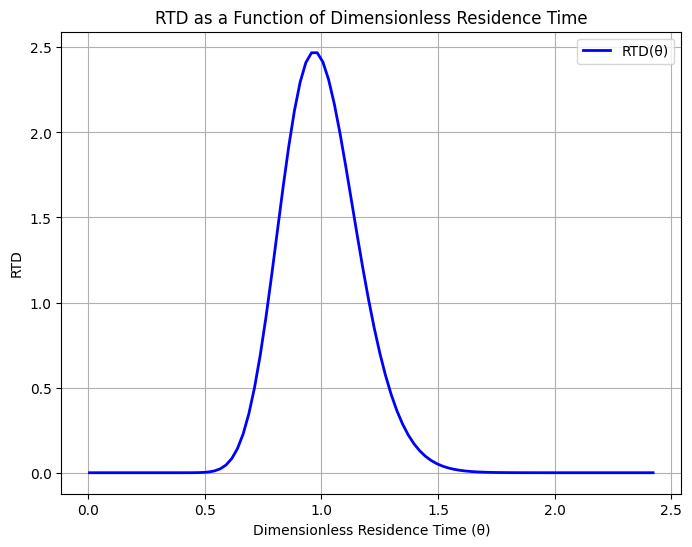

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Definindo os parâmetros
vr = 200            # Volumetric Flow Rate
nx = 30               # Número de compartimentos (modelo de tanques em série)
Vol_ratio = 0.104678       # Segregation (ajuste para o valor adequado)

# Definindo o intervalo de tempo
t = np.linspace(1, 400, 100)  # Tempo (ajuste conforme necessário)

# Calculando o tempo médio de residência (thau) e o tempo adimensional (theta)
thau = 33027.504754 / vr
theta = t / thau

# Segregação (alpha) baseada na relação volumétrica
alpha = Vol_ratio

# Função RTD

c = ((nx * (theta - alpha)) / (1 - alpha))
RTD = ((nx) / ((1 - alpha) * (np.math.factorial(nx - 1)))) * (c ** (nx - 1)) * np.exp(-c) * 1

# Plotando o gráfico
plt.figure(figsize=(8, 6))
plt.plot(theta, RTD, label='RTD(θ)', color='b', lw=2)
plt.xlabel('Dimensionless Residence Time (θ)')
plt.ylabel('RTD')
plt.title('RTD as a Function of Dimensionless Residence Time')
plt.grid(True)
plt.legend()
plt.show()


# TESTE